# **Clasificador de números con TensorFlow y MNIST**

En este bloc de notas se construirá un clasificador de números con **Tensorflow** y **Keras**. Se utilizará uno de los datasets clásicos conocido como [MNIST](http://yann.lecun.com/exdb/mnist/).

In [ ]:
!pip install pyyaml h5py  # Requerido para guardar modelos en formato HDF5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Bibliotecas de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


Importamos el dataset de MNIST

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Este Dataset contiene imágenes en arreglos de Numpy de 28x28. Las etiquetas (labels) son un arreglo de enteros, que van de 0 a 9. Estos corresponden a la clase (class) del número que la imagen representa.

```
0	Número 0
1	Número 1
2	Número 2
3	Número 3
4	Número 4
5	Número 5
6	Número 6
7	Número 7
8	Número 8
9	Número 9
```


Cada imagen corresponde a una etiqueta en particular, crearemos el arreglo de clases ya que éste no es proporcionado por el dataset.

In [ ]:
class_names = ['cero', 'uno', 'dos', 'tres', 'cuatro',
               'cinco', 'seis', 'siete', 'ocho', 'nueve']

Exploremos el Dataset

In [ ]:
print(x_train.shape)
print(len(y_train))

(60000, 28, 28)
60000


In [ ]:
print(y_train)

[5 0 4 ... 5 6 8]


In [ ]:
print(x_test.shape)
print(len(y_test))

(10000, 28, 28)
10000


## **Pre-procesamiento**

Una vez que hemos cargado nuestro Dataset procederemos al siguiente paso: el pre-procesamiento o limpieza y estandarización de los datos. Como ya hemos mencionado antes, los colores siguen una escala de 0 a 255 por lo que típicamente cuando se trata de imágenes, usamos 255 para dividir cada valor y concertirlos a un valor entre 0 y 1.

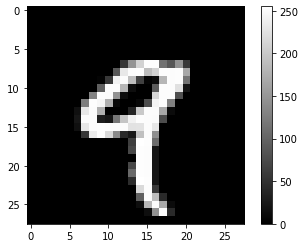

In [ ]:
plt.figure()
plt.imshow(x_train[4], cmap="gray")
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0
#x_train = x_train / 255.0
#x_test = x_test / 255.0

In [ ]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Vamos a verificar que el conjunto de datos se encuentre en el formato adecuado desplegando las primeras 10 imágenes del *training set* y desplegaremos el nombre de cada clase debajo de la imagen.

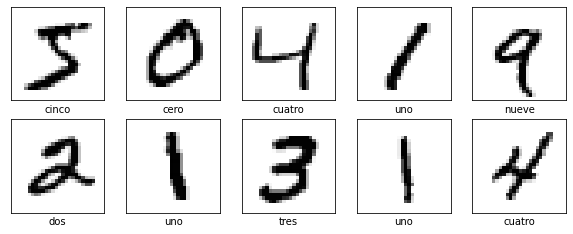

In [ ]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

## **Construir el modelo**

Construir la red neuronal oimplica configurar las capas del modelo y posteriormente compilar el modelo.

### Configurando las capas

Los bloques de construcción básicos de una red neuronal son sus capas o *layers*.  La mayoría de las tareas del aprendizaje profundo (Deep learning) consiste en unir varias capas sencillas. La gran mayoría de los tipos de capas disponibles en la blibioteca Keras de Tensorflow tienen parámetros que se ajustarán (serán aprendidos) durante el entrenamiento.

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2), #Agregamos una capa de pérdida para evitar el overfitting
    keras.layers.Dense(10, activation='softmax')
])

La primera capa de esta red, `tf.keras.layers.Flatten`, transforma el formato de las imágenes de un arreglo bi-dimensional (de 28 por 28 pixeles) a un arreglo uni dimensional (de 28x28 pixeles = 784 pixeles). Una capa *Flatten* no tiene parámetros que aprender, simplemente nos sirve para reformatear el conjunto de datos.

Después de que los pixeles estan "aplanados", la secuencia consiste de dos capas `tf.keras.layers.Dense`. Estas están densamente conectadas, o completamente conectadas. La primera capa *Dense* tiene 128 nodos (o neuronas). La segunda (y última) capa es una capa de 10 nodos *softmax* que devuelve un arreglo de 10 probabilidades que suman a 1. Cada nodo contiene una calificacion que indica la probabilidad que la actual imagen pertenece a una de las 10 clases. Hemos agregado una capa de pérdida (Dropout) entre las dos capas anteriores para prevenir el overfitting, esta capa lo que hará será que introducirá una pérdida de aprendizaje en el modelo.

## **Compilando el modelo**

Antes de que el modelo esté listo para entrenar, se necesitan algunas configuraciones más. Éstas son agregadas durante el paso de compilación del modelo:

1.   *Loss function* (función de pérdida) —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta funcion para dirigir el modelo en la direccion adecuada.
2.   *Optimizer* (optimizador) — Esto es como el modelo se actualiza basado en el conjunto de datos que ve y la función de pérdida.
3.   *Metrics* (métricas) — Se usan para monitorear los pasos de entrenamiento y de pruebas. El siguiente ejemplo usa accuracy (exactitud), la fracción de la imágenes que son correctamente clasificadas.





In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Mostramos un resumen del modelo creado:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Entrenar el modelo

Entrenar el modelo de red neuronal requiere de los siguientes pasos:

1. Entregue los datos de entrenamiento al modelo. En este ejemplo, el conjunto de datos de entrenamiento está en los arreglos *x_train* y *y_train*.
2. el modelo aprende a asociar imágenes y etiquetas.
3. Usted le pide al modelo que haga predicciones sobre un conjunto de datos que se encuentran en el ejemplo, incluido en el arreglo *x_test*. Verifique que las predicciones sean iguales a las etiquetas de el arreglo *y_test*.

Para comenzar a entrenar, llame el metodo `model.fit`, es llamado así por que fit (ajusta) el modelo al conjunto de datos de entrenamiento:

In [ ]:
epocas = 5
model.fit(x_train, y_train, epochs=epocas)

Epoch 1/5
1875/1875 [==============================] - 7s 2ms/step - loss: 0.2943 - accuracy: 0.9151
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1440 - accuracy: 0.9576
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1076 - accuracy: 0.9681
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0881 - accuracy: 0.9723
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0734 - accuracy: 0.9773


A medida que el modelo entrena, la pérdida y la exactitud son desplegadas. Este modelo alcanza una exactitud cercana a  0.98 (o 98%) sobre el conjunto de datos de entrenamiento.

## Evaluando la exactitud

A continuación comparamos el rendimiento del modelo sobre el conjunto de datos de prueba:

In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nPrueba de Exactitud (Test accuracy):', test_acc)

313/313 - 1s - loss: 0.0794 - accuracy: 0.9765 - 1s/epoch - 4ms/step

Prueba de Exactitud (Test accuracy): 0.9764999747276306


Como podemos ver la exactitud sobre el conjunto de datos de prueba es similar o incluso superior que la exactitud sobre el conjunto de entrenamiento. Lo anterior significa que nuestra capa de Dropout si evitó el overfitting (sobre ajuste).

**Nota:** Sobre ajuste sucede cuando un modelo de aprendizaje máquina (ML) tiene un rendimiento menor sobre un conjunto de datos nuevo, que nunca antes ha visto comparado con el de entrenamiento.

## **Haciendo predicciones**

Habiendo entrenado el modelo, podemos usarlo para hacer predicciones.

In [ ]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


Con la línea de código anterior, hemos predecido la etiqueta de cada una de las imágenes del conjunto de prueba. Revisemos las predicciones:

In [ ]:
predictions[0]

array([4.7641726e-09, 2.0609960e-09, 2.4392252e-06, 1.2586993e-05,
       9.0341614e-12, 1.6085572e-08, 8.6441287e-13, 9.9998462e-01,
       7.0087132e-09, 3.5079631e-07], dtype=float32)

In [ ]:
print(predictions[0][0])

4.7641726e-09


Cada predicción es un arreglo de 10 números. Estos representan el nivel de "confianza" del modelo sobre las imágenes de cada uno de los 10 artículos de moda/ropa. Ustedes pueden revisar cual tiene el nivel más alto de confianza:

In [ ]:
np.argmax(predictions[0])

7

Entonces, el modelo tiene mayor confianza que esta imagen es el número 7 o class_names[7]. Examinando las etiquetas de test o de pruebas muestra que esta clasificación es correcta:

In [ ]:
y_test[0]

7

Graficaremos el vector de predicciones para entender mejor lo anterior:

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Revisemos la imagen [0] y la [12], sus predicciones y el arreglo de predicciones. Las etiquetas de predicción correctas están en azul y las incorrectas están en rojo. El número entrega el porcentaje (sobre 100) para la etiqueta predecida.

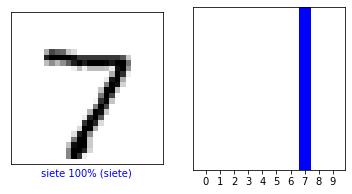

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

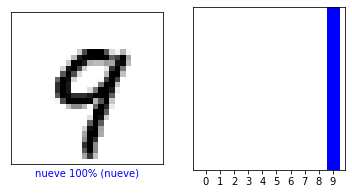

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

Ahora se mostrarán varias imágenes con su predicciones. Nótese que el modelo puede arrojar una predicción incorrecta aún cuando tenga mucha certeza sobre su predicción.

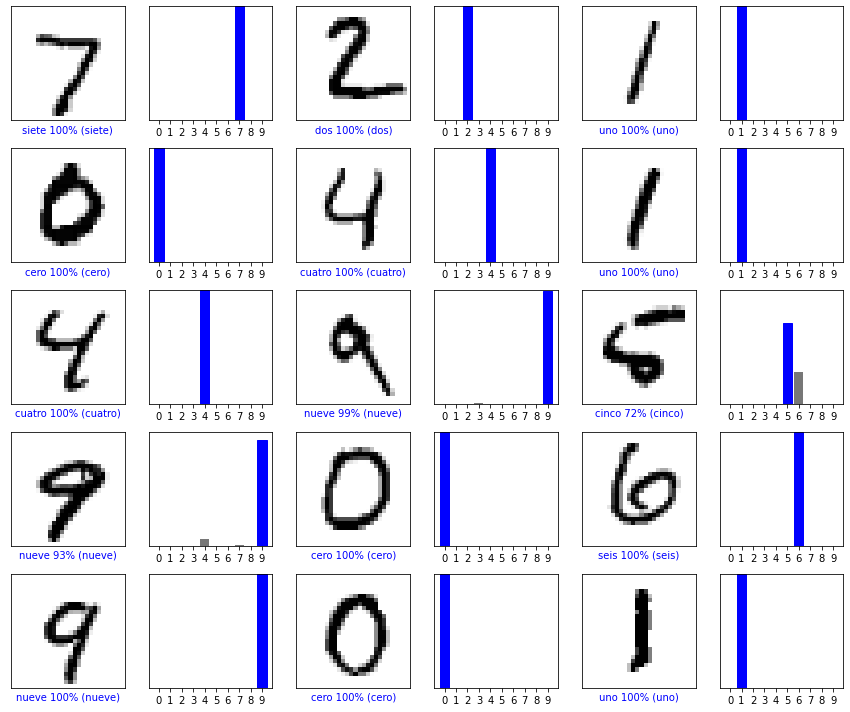

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Muestra las x primeras imágenes, sus etiquetas predecidas y los valores reales.
# Color correct predictions in blue and incorrect predictions in red.
# Las predicciones correctas están en azul y las incorrectas en rojo.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

Finalmente, usaremos el modelo entrenado para hacer una predicción sobre una única imagen.

In [ ]:
# Grab an image from the test dataset.
# Tomamos una imagen del dataset de pruebas.
img = x_test[1]

print(img.shape)

(28, 28)


In [ ]:
print(img)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.45490196 0.49019608
  0.6705882

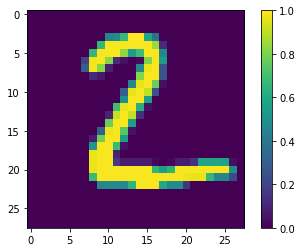

In [ ]:
plt.figure()
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()

Los modelos de tf.keras son optimizados sobre batch o bloques, o colecciones de ejemplos por vez. De acuerdo a esto, aunque se use una única imagen hay que agregarla a una lista:

In [ ]:
# Add the image to a batch where it's the only member.
# Agregamos la imagen a un lote donde es el único miembro
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Hagamos la predicción:

In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 18ms/step
[[1.22727635e-11 3.43994952e-06 9.99995708e-01 5.84708573e-07
  8.44547352e-18 9.88928335e-08 1.17293419e-09 7.12734857e-15
  5.96054122e-08 2.90614992e-15]]


In [ ]:
print(predictions_single[0][0])

1.22727635e-11


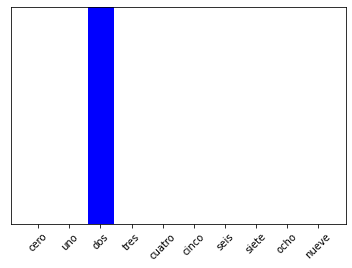

In [ ]:
plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

*model.predict* retorna una lista de listas para cada imagen dentro del batch o bloque de datos. Tomemos la predicción para nuestra única imagen dentro del batch o bloque:

In [ ]:
np.argmax(predictions_single[0])

2

El modelo predice una etiqueta de 2, que corresponde a la clase ubicada en esa posición.

In [ ]:
print(class_names[2])

dos


## **Guardando el modelo**

Habiendo entrenado y probado el modelo, podemos guardarlo para su uso futuro. Si desea guardarlo en formato h5, agregue ".h5" al nombre del modelo, si desea guardarlo en formato normal solo inidque el nombre del modelo.

In [ ]:
# model.save("model_mnist")
model.save("model_mnist.h5") #Para huaradrlo en formato h5

Cargamos ahora el modelo y revisamos su estructura

In [ ]:
new_model = tf.keras.models.load_model("model_mnist.h5")

# Verificamos la estructura del modelo
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Probamos ahora el modelo con uno de los dígitos del dataset

In [ ]:
image = x_test[8]

print(image.shape)

(28, 28)


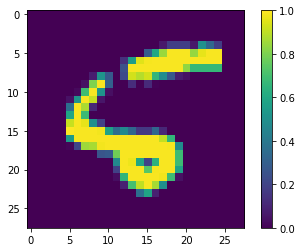

In [ ]:
plt.figure()
plt.imshow(image)
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = new_model.predict(img)

print(predictions_single)

(1, 1, 28, 28)
1/1 [==============================] - 0s 37ms/step
[[1.1237193e-08 5.4758129e-07 2.0895645e-06 4.1859897e-07 1.6024778e-06
  7.1532935e-01 2.8437111e-01 2.1881245e-08 2.8993364e-04 4.8860111e-06]]


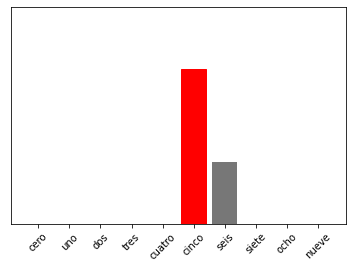

In [ ]:
plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
print(np.argmax(predictions_single[0]))
print(class_names[np.argmax(predictions_single[0])])

NameError: ignored

## **Cierre**
Hemos llegado al final de la práctica, utilizamos el dataset de [MNIST](http://yann.lecun.com/exdb/mnist/) que contiene 70,000 imágenes en escala de grises en 10 categorías o clases (60,000 de entrenamiento y 10,000 de prueba). Las imágenes están en una resolución de 28x28 y muestran números escritos a mano.

<img src="https://miro.medium.com/max/530/1*VAjYygFUinnygIx9eVCrQQ.png" style="width:650px;height:400px;">

Figura 1. Muestra del Dataset MNIST.





---



Este ejemplo se basa parcialmente en la documentación de Tensorflow: https://www.tensorflow.org/tutorials/quickstart/beginner